## Results of the syntactic sketch knockout experiments

In [1]:
import os, os.path
import re

from pandas import DataFrame as df
from pandas import read_csv
import pandas
import seaborn as sns

In [2]:
input_dir = 'edt_2.6'   # Experiments done on Estonian Dependency Treebank version 2.6

for fname in os.listdir(input_dir):
    if fname.startswith('results_') and fname.endswith('.csv'):
        print(fname)

results_crossvalidation.csv
results_full_data_malt_udpipe1.csv
results_gap_experiments.csv
results_gold_and_auto_ud_morph.csv
results_half_data.csv
results_smaller_data.csv
results_stanza_basic.csv
results_stanza_ME_error_types.csv
results_stanza_ME_sketches_5groups_knockout.csv
results_stanza_ME_sketches_5groups_knockout_matrix.csv
results_stanza_ME_sketches_5randomgroups_knockout.csv
results_stanza_ME_sketches_5randomgroups_knockout_matrix.csv


In [3]:
pandas.set_option('display.max_colwidth', None)

In [4]:
# Randomly grouped sketches
read_csv('edt_2.6/preannotated/morph_extended_clauses/top_50_sketches_5_groups.csv', index_col=0)

,grouped_sketches,support
0,[V]nsubj(L)obl(L);[V]nsubj(L)obl(L)obl(P);[S]advmod(L)cop(L)nsubj:cop(L);[S]cop(L)nsubj:cop(P);[V]aux(L)nsubj(L)obl(L);[V]obj(L)obl(L);[V]nsubj(L)xcomp(P);[V]obj(P)obl(L);[V]obj(P);[V]obj(L),4157
1,[S]nmod(L);[V]advmod(L)nsubj(P);[V]aux(L)nsubj(L)obj(L);[S]amod(L);[V]advmod(L);[V];[V]nsubj(L)obj(P);[S];[V]nsubj(L)obj(P)obl(L);[V]nsubj(P)obl(L),5167
2,[V]obj(L)obl(P);[V]nsubj(L)obj(L);[S]amod(L)cop(L)nsubj:cop(L);[V]advmod(L)obl(L);[S]cop(L)nmod(L)nsubj:cop(L);[V]advmod(L)nsubj(L)obj(L);[V]nsubj(L)obj(L)obl(P);[V]advmod(L)nsubj(L)obj(L)obl(L);[V]advmod(L)obj(L);[S]cop(L)nsubj:cop(L),3374
3,[V]nsubj(L)obj(L)obl(L);[S]advmod(L);[S]cop(L)nsubj:cop(L)obl(L);[V]nsubj(L)obl(P);[V]nsubj(P)obl(P);[V]advmod(L)nsubj(L)obl(P);[V]nsubj(L);[V]advmod(L)nsubj(L);[V]nsubj(L)xcomp(L);[V]obl(P),4904
4,[V]nsubj(L)obl(L)obl(L);[V]advmod(L)nsubj(L)obl(L);[V]aux(L);[X];[V]xcomp(P);[V]aux(L)nsubj(L);[S]nummod(L);[V]nsubj(P);[V]nsubj(P)obj(L);[V]obl(L),3332


In [5]:
# Test matrix: rows are test sets, columns are models
test_matrix = read_csv('edt_2.6/results_stanza_ME_sketches_5groups_knockout_matrix.csv', index_col=0)
test_matrix

,group0,group1,group2,group3,group4
group0,0.8922,0.9045,0.9107,0.9143,0.9085
group1,0.9202,0.9045,0.9193,0.9150,0.9154
group2,0.9294,0.9247,0.9132,0.9187,0.9247
group3,0.9141,0.9127,0.9191,0.8906,0.9176
group4,0.9198,0.9188,0.9209,0.9209,0.8955


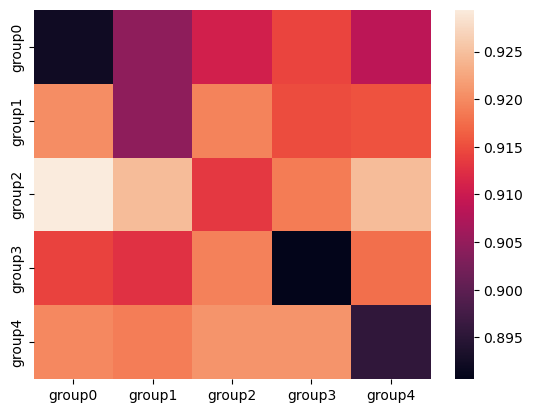

In [6]:
fig = sns.heatmap(test_matrix).get_figure()
fig.savefig("sketches_5groups_knockout_matrix.pdf")

In [7]:
# Random control group test matrix: rows are test sets, columns are models
rnd_test_matrix = read_csv('edt_2.6/results_stanza_ME_sketches_5randomgroups_knockout_matrix.csv', index_col=0)
rnd_test_matrix

,group0,group1,group2,group3,group4
group0,0.9118,0.9056,0.9147,0.9118,0.9099
group1,0.9132,0.9176,0.9158,0.9097,0.9158
group2,0.9199,0.9219,0.9231,0.9183,0.9199
group3,0.9180,0.9155,0.9137,0.9166,0.9184
group4,0.9244,0.9193,0.9193,0.9188,0.9214


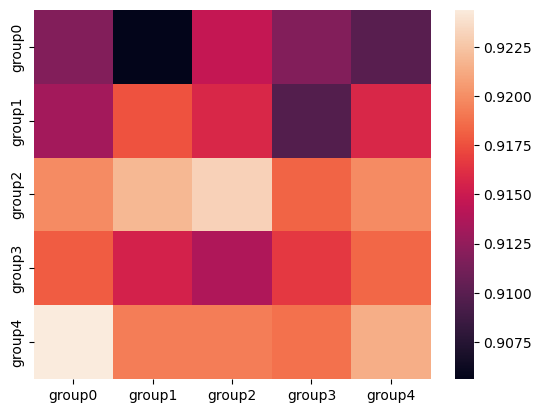

In [8]:
fig = sns.heatmap(rnd_test_matrix).get_figure()
fig.savefig("sketches_5groups_random_knockout_matrix.pdf")

In [9]:
# Results on test_50x50 file
read_csv('edt_2.6/results_stanza_ME_sketches_5groups_knockout.csv', index_col=0).drop(['UAS_test'], axis=1)

,LAS_test
experiment,
eval_stanza_morph_extended_sketches_knockout_5groups_single_file_group0,0.9144
eval_stanza_morph_extended_sketches_knockout_5groups_single_file_group1,0.9128
eval_stanza_morph_extended_sketches_knockout_5groups_single_file_group2,0.9163
eval_stanza_morph_extended_sketches_knockout_5groups_single_file_group3,0.9110
eval_stanza_morph_extended_sketches_knockout_5groups_single_file_group4,0.9131


In [10]:
# Results on test_50x50 file (random control group)
read_csv('edt_2.6/results_stanza_ME_sketches_5randomgroups_knockout.csv', index_col=0).drop(['UAS_test'], axis=1)

,LAS_test
experiment,
eval_stanza_morph_extended_sketches_knockout_5randomgroups_single_file_group0,0.9171
eval_stanza_morph_extended_sketches_knockout_5randomgroups_single_file_group1,0.9156
eval_stanza_morph_extended_sketches_knockout_5randomgroups_single_file_group2,0.9171
eval_stanza_morph_extended_sketches_knockout_5randomgroups_single_file_group3,0.9149
eval_stanza_morph_extended_sketches_knockout_5randomgroups_single_file_group4,0.9168
